# Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Pre Processing Features

### Company level data

In [2]:
comp_df = pd.read_csv('fundamentals_annual/shifted_data.csv', index_col='Unnamed: 0')
print(comp_df.columns)
comp_df.datadate = pd.to_datetime(comp_df.datadate)#.dt.year
# comp_df.set_index('datadate', inplace= True)
comp_df#.head(5)

Index(['gvkey', 'datadate', 'fyear', 'fyr', 'acominc', 'act', 'ap', 'at', 'ch',
       'citotal', 'cshpri', 'dltt', 'dvt', 'ebit', 'ebitda', 'gp', 'icapt',
       'invt', 'lt', 'opeps', 'revt', 'seq', 'txdi', 'txp', 'txt', 'sic', 'ni',
       'pi', 'txpd'],
      dtype='object')


,gvkey,datadate,fyear,fyr,acominc,act,ap,at,ch,citotal,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
0,2080,2000-11-30,2000,11,1.0,136.0,20.0,346.0,3.0,3.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
1,2080,2001-11-30,2001,11,3.0,98.0,15.0,301.0,5.0,3.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2,2080,2002-11-30,2002,11,1.0,102.0,17.0,290.0,1.0,3.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
3,2080,2003-11-30,2003,11,2.0,100.0,15.0,280.0,15.0,3.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
4,2080,2004-11-30,2004,11,2.0,102.0,19.0,297.0,4.0,3.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,271841,2015-12-31,2015,12,0.0,1090.0,105.0,1707.0,20.0,18.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2756,271841,2016-12-31,2016,12,0.0,1045.0,87.0,1601.0,9.0,-358.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2757,271841,2017-12-31,2017,12,0.0,523.0,77.0,868.0,8.0,-257.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0
2758,271841,2018-12-31,2018,12,0.0,438.0,60.0,652.0,8.0,-109.0,...,-4.0,270.0,126.0,-7.0,14.0,-6.0,1520,-7.0,-115.0,0.0


#### To fyear or not to fyear?

For now, just taking datadate year

In [3]:
comp_df.iloc[np.where(comp_df.datadate.dt.year != comp_df.fyear)]

,gvkey,datadate,fyear,fyr,acominc,act,ap,at,ch,citotal,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
52,2820,2002-03-31,2001,3,0.0,39.0,8.0,117.0,0.0,5.0,...,0.0,95.0,56.0,0.0,0.0,0.0,2452,-5.0,3.0,0.0
53,2820,2003-03-31,2002,3,0.0,35.0,3.0,111.0,0.0,5.0,...,0.0,110.0,92.0,0.0,0.0,0.0,2452,6.0,6.0,0.0
54,2820,2004-03-31,2003,3,0.0,54.0,6.0,129.0,30.0,5.0,...,1.0,128.0,97.0,2.0,0.0,3.0,2452,10.0,9.0,1.0
55,2820,2005-03-31,2004,3,0.0,70.0,5.0,145.0,46.0,10.0,...,1.0,157.0,108.0,2.0,0.0,6.0,2452,15.0,15.0,3.0
56,2820,2006-03-31,2005,3,0.0,89.0,6.0,168.0,15.0,15.0,...,2.0,189.0,125.0,2.0,0.0,8.0,2452,11.0,23.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,198058,2016-03-31,2015,3,-81.0,1669.0,131.0,2566.0,702.0,825.0,...,4.0,4712.0,1995.0,-2.0,51.0,334.0,2300,552.0,1172.0,273.0
2704,198058,2017-03-31,2016,3,-81.0,1164.0,176.0,2409.0,227.0,552.0,...,3.0,4493.0,1592.0,-61.0,60.0,137.0,2300,591.0,688.0,171.0
2705,198058,2018-03-31,2017,3,50.0,1262.0,294.0,4059.0,163.0,723.0,...,4.0,4718.0,2017.0,9.0,77.0,149.0,2300,543.0,741.0,103.0
2706,198058,2019-03-31,2018,3,-66.0,1729.0,371.0,6650.0,172.0,426.0,...,4.0,5238.0,2429.0,-71.0,34.0,79.0,2300,-223.0,621.0,172.0


In [4]:
comp_df.iloc[np.where(comp_df.datadate.dt.year == comp_df.fyear)]

,gvkey,datadate,fyear,fyr,acominc,act,ap,at,ch,citotal,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
0,2080,2000-11-30,2000,11,1.0,136.0,20.0,346.0,3.0,3.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
1,2080,2001-11-30,2001,11,3.0,98.0,15.0,301.0,5.0,3.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2,2080,2002-11-30,2002,11,1.0,102.0,17.0,290.0,1.0,3.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
3,2080,2003-11-30,2003,11,2.0,100.0,15.0,280.0,15.0,3.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
4,2080,2004-11-30,2004,11,2.0,102.0,19.0,297.0,4.0,3.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,271841,2015-12-31,2015,12,0.0,1090.0,105.0,1707.0,20.0,18.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2756,271841,2016-12-31,2016,12,0.0,1045.0,87.0,1601.0,9.0,-358.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2757,271841,2017-12-31,2017,12,0.0,523.0,77.0,868.0,8.0,-257.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0
2758,271841,2018-12-31,2018,12,0.0,438.0,60.0,652.0,8.0,-109.0,...,-4.0,270.0,126.0,-7.0,14.0,-6.0,1520,-7.0,-115.0,0.0


In [5]:
comp_df.datadate = comp_df.datadate.dt.year
comp_df

,gvkey,datadate,fyear,fyr,acominc,act,ap,at,ch,citotal,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
0,2080,2000,2000,11,1.0,136.0,20.0,346.0,3.0,3.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
1,2080,2001,2001,11,3.0,98.0,15.0,301.0,5.0,3.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2,2080,2002,2002,11,1.0,102.0,17.0,290.0,1.0,3.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
3,2080,2003,2003,11,2.0,100.0,15.0,280.0,15.0,3.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
4,2080,2004,2004,11,2.0,102.0,19.0,297.0,4.0,3.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,271841,2015,2015,12,0.0,1090.0,105.0,1707.0,20.0,18.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2756,271841,2016,2016,12,0.0,1045.0,87.0,1601.0,9.0,-358.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2757,271841,2017,2017,12,0.0,523.0,77.0,868.0,8.0,-257.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0
2758,271841,2018,2018,12,0.0,438.0,60.0,652.0,8.0,-109.0,...,-4.0,270.0,126.0,-7.0,14.0,-6.0,1520,-7.0,-115.0,0.0


#### Continuing with data Date year

What are the following:
- acominc

In [6]:
comp_data = comp_df.drop(['fyear','fyr'], axis= 1)
comp_data.set_index('datadate', inplace= True)
comp_data

,gvkey,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,...,opeps,revt,seq,txdi,txp,txt,sic,ni,pi,txpd
datadate,,,,,,,,,,,,,,,,,,,,,
2000,2080,1.0,136.0,20.0,346.0,3.0,3.0,11.0,45.0,9.0,...,1.0,367.0,249.0,1.0,0.0,4.0,2511,-3.0,15.0,1.0
2001,2080,3.0,98.0,15.0,301.0,5.0,3.0,11.0,7.0,9.0,...,0.0,305.0,234.0,-1.0,0.0,-2.0,2511,6.0,-4.0,1.0
2002,2080,1.0,102.0,17.0,290.0,1.0,3.0,11.0,3.0,9.0,...,0.0,323.0,229.0,2.0,0.0,2.0,2511,-1.0,9.0,0.0
2003,2080,2.0,100.0,15.0,280.0,15.0,3.0,11.0,0.0,9.0,...,0.0,316.0,220.0,-2.0,1.0,0.0,2511,8.0,4.0,-4.0
2004,2080,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,...,0.0,315.0,221.0,1.0,0.0,2.0,2511,7.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,271841,0.0,1090.0,105.0,1707.0,20.0,18.0,183.0,275.0,4.0,...,0.0,627.0,781.0,-5.0,25.0,1.0,1520,-358.0,19.0,1.0
2016,271841,0.0,1045.0,87.0,1601.0,9.0,-358.0,181.0,200.0,0.0,...,-2.0,302.0,592.0,27.0,15.0,30.0,1520,-257.0,-155.0,3.0
2017,271841,0.0,523.0,77.0,868.0,8.0,-257.0,13.0,161.0,0.0,...,-20.0,198.0,228.0,-8.0,14.0,-7.0,1520,-109.0,-294.0,0.0


<AxesSubplot:>

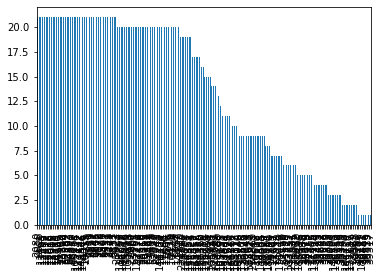

In [7]:
comp_data.gvkey.value_counts().plot(kind = 'bar')

Drop companies which don't have 20 years of data?

### Treasury/Inflation Data

,b30ret,b20ret,b10ret,b7ret,b5ret,b2ret,b1ret,t90ret,t30ret,cpiret
caldt,,,,,,,,,,
2001,0.033705,0.040867,0.040302,0.076023,0.082663,0.086428,0.074351,0.044809,0.037786,0.015517
2002,0.163857,0.172186,0.146641,0.149588,0.131414,0.067811,0.034147,0.017951,0.016339,0.023769
2003,0.006738,0.024512,0.012763,0.026151,0.028316,0.019835,0.014680,0.011604,0.010182,0.018794
2004,0.087015,0.082811,0.051849,0.040793,0.023355,0.007544,0.006780,0.013080,0.012005,0.032557
2005,0.089353,0.076566,0.031030,0.017948,0.006416,0.015241,0.022705,0.030790,0.029633,0.034156


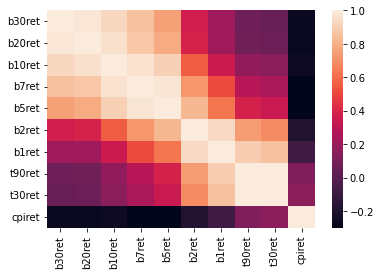

In [8]:
treasury_data = pd.read_csv('treasury_inflation/treasury_inflation.csv')
treasury_data.caldt = pd.to_datetime(treasury_data.caldt).dt.year
treasury_data.set_index('caldt', inplace = True)
# ((treasury_data.cpiret + 1).cumprod() - 1).plot()     #plot cpiret/ Inflation Rate
sns.heatmap(treasury_data.corr())
treasury_data.head()

The returns on the bills are highly correlated.

Thus, taking all of them is redundant.

We will take one from each:
- short term _(t90ret)_
- long term _(b5ret)_

We also take the _cpiret_ (Inflation rate)

,t90ret,b5ret,cpiret
t90ret,1.000000,0.383748,0.119947
b5ret,0.383748,1.000000,-0.298397
cpiret,0.119947,-0.298397,1.000000


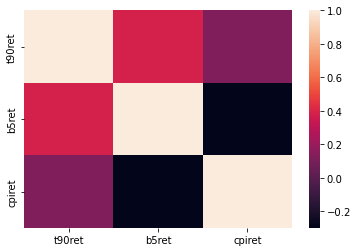

In [9]:
sns.heatmap(treasury_data[['t90ret','b5ret','cpiret']].corr())
# sns.heatmap(treasury_data[['t30ret','b5ret','b30ret','cpiret']].corr())
treasury_data = treasury_data[['t90ret','b5ret','cpiret']]
treasury_data.corr()

In [10]:
treasury_data

,t90ret,b5ret,cpiret
caldt,,,
2001,0.044809,0.082663,0.015517
2002,0.017951,0.131414,0.023769
2003,0.011604,0.028316,0.018794
2004,0.013080,0.023355,0.032557
2005,0.030790,0.006416,0.034156
2006,0.048354,0.027717,0.025408
2007,0.050863,0.101754,0.040814
2008,0.020446,0.131459,0.000915
2009,0.002232,-0.024693,0.027213


## Market Data

In [11]:
index_df = pd.read_csv('index_prices/index_prices.csv')
index_df.datadate = pd.to_datetime(index_df.datadate)
index_df.set_index('datadate', inplace= True)
# index_data.set_index(['tic','datadate'], inplace= True)
index_df.head()

,gvkeyx,bkvlps,cshtrm,dvpsxm,dvrate,epsx12,prccm,prchm,prclm,conm,indextype,tic,spii,spmi,indexcat
datadate,,,,,,,,,,,,,,,
1990-01-31,3,NaN,NaN,0.92,11.40,22.869,329.0798,360.5898,319.8298,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-02-28,3,NaN,NaN,0.92,11.40,22.869,331.8899,336.0898,322.0999,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-03-31,3,NaN,NaN,0.92,11.04,21.670,339.9400,343.5300,332.7400,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-04-30,3,NaN,NaN,1.07,11.04,21.670,330.7998,347.2998,327.7598,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P
1990-05-31,3,NaN,NaN,1.07,11.04,21.670,361.2300,362.2598,330.7998,S&P 500 Comp-Ltd,LGCAP,I0003,NaN,10.0,S&P


In [12]:
# Only interested in the close price
index_data = index_df[['tic','prccm']]
index_data

,tic,prccm
datadate,,
1990-01-31,I0003,329.0798
1990-02-28,I0003,331.8899
1990-03-31,I0003,339.9400
1990-04-30,I0003,330.7998
1990-05-31,I0003,361.2300
...,...,...
2021-09-30,AHD.I,506.6692
2021-10-31,AHD.I,519.2445
2021-11-30,AHD.I,529.0903


In [13]:
from scipy.stats.mstats import gmean

def annual_returns(close_price):
    # print(close_price, gmean(close_price.pct_change()[1:] + 1) -1)
    close_price.fillna(close_price.mean(), inplace = True)
    return gmean(close_price.pct_change()[1:] + 1) -1

In [14]:
index_data.groupby(['tic'])['prccm'].resample('A').agg(annual_returns).unstack().T

tic,AHD.I,CI0775,CI1040,CI1311,I0003
datadate,,,,,
1990-12-31,NaN,-0.005401,-0.027032,-0.005709,0.000314
1991-12-31,NaN,0.024472,0.001774,-0.013178,0.017688
1992-12-31,NaN,-0.004126,0.005056,0.003941,0.005815
1993-12-31,NaN,0.008754,0.068482,0.024744,0.005575
1994-12-31,0.000000,-0.009898,-0.010919,-0.010245,-0.004309
1995-12-31,0.014851,0.022064,0.019097,0.017911,0.024803
1996-12-31,0.000125,0.010246,-0.005868,0.028377,0.013953
1997-12-31,0.018264,0.001792,-0.045402,-0.003439,0.019328
1998-12-31,0.002091,0.011623,-0.012651,-0.028258,0.020786


In [15]:
index_df[['tic','conm']].drop_duplicates()

,tic,conm
datadate,,
1990-01-31,I0003,S&P 500 Comp-Ltd
1990-01-31,CI1040,S&P/TSX-Gold/Precious Minrls
1990-01-31,CI1311,S&P/TSX-Oil And Gas
1990-01-31,CI0775,S&P/TSX-Consumer Products
1992-12-31,AHD.I,SP500 Household Durables .I


Since only S&P500 and S&P500 Household Durables have recent data, we consider only these market indicators

### CHECK?!!!!!

In [16]:
index_data = index_data.groupby(['tic'])['prccm'].resample('A').agg(annual_returns).unstack().T
index_data = index_data[['I0003','AHD.I']].dropna()
index_data.index = index_data.index.year
index_data.rename({'I0003':'SNP500', "AHD.I":'SNP500_CD'}, axis=1, inplace= True)
index_data

tic,SNP500,SNP500_CD
datadate,,
1994,-0.004309,0.000000
1995,0.024803,0.014851
1996,0.013953,0.000125
1997,0.019328,0.018264
1998,0.020786,0.002091
1999,0.012640,-0.015632
2000,-0.004957,-0.002144
2001,-0.015676,0.012427
2002,-0.022509,-0.003884


## Merge

In [17]:
# treasury_data.join(index_data).to_csv('market_data.csv')
treasury_data.join(index_data)

,t90ret,b5ret,cpiret,SNP500,SNP500_CD
caldt,,,,,
2001,0.044809,0.082663,0.015517,-0.015676,0.012427
2002,0.017951,0.131414,0.023769,-0.022509,-0.003884
2003,0.011604,0.028316,0.018794,0.024097,0.029007
2004,0.013080,0.023355,0.032557,0.006291,0.016300
2005,0.030790,0.006416,0.034156,0.005029,0.007722
2006,0.048354,0.027717,0.025408,0.009365,-0.007227
2007,0.050863,0.101754,0.040814,0.001886,-0.036031
2008,0.020446,0.131459,0.000915,-0.037706,-0.054795
2009,0.002232,-0.024693,0.027213,0.027671,0.044671


In [18]:
df = comp_data.iloc[comp_data.index != 2000].join(treasury_data.join(index_data))
df

,gvkey,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,...,txt,sic,ni,pi,txpd,t90ret,b5ret,cpiret,SNP500,SNP500_CD
2001,2080,3.0,98.0,15.0,301.0,5.0,3.0,11.0,7.0,9.0,...,-2.0,2511,6.0,-4.0,1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,2113,0.0,9.0,2.0,9.0,0.0,-1.0,1.0,0.0,1.0,...,0.0,2330,0.0,1.0,0.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,2444,-45.0,1400.0,214.0,3157.0,108.0,143.0,87.0,600.0,43.0,...,47.0,3510,78.0,132.0,-27.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,3622,0.0,62.0,8.0,90.0,1.0,1.0,8.0,47.0,0.0,...,-1.0,2211,27.0,-74.0,-1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
2001,3647,0.0,126.0,27.0,289.0,1.0,-9.0,11.0,109.0,1.0,...,-5.0,2211,-4.0,-13.0,-1.0,0.044809,0.082663,0.015517,-0.015676,0.012427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,142546,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,...,5.0,3730,29.0,24.0,4.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,175319,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,...,-108.0,2300,77.0,-184.0,116.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,178015,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,...,251.0,2300,588.0,897.0,305.0,0.006920,0.073770,0.013621,0.013940,0.010226
2020,185195,0.0,218.0,20.0,535.0,49.0,16.0,33.0,113.0,0.0,...,5.0,3100,8.0,20.0,6.0,0.006920,0.073770,0.013621,0.013940,0.010226


### Shifting Previous year ni

In [19]:
df['prev_ni'] = df.groupby('gvkey')['ni'].shift(1)
df['prev2_ni'] = df.groupby('gvkey')['prev_ni'].shift(1)
df['prev3_ni'] = df.groupby('gvkey')['prev2_ni'].shift(1)
df.dropna(subset=['prev_ni','prev2_ni','prev3_ni'], inplace= True)
data = df.drop(['gvkey'], axis = 1)
data

,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,pi,txpd,t90ret,b5ret,cpiret,SNP500,SNP500_CD,prev_ni,prev2_ni,prev3_ni
2004,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,3.0,...,10.0,1.0,0.01308,0.023355,0.032557,0.006291,0.016300,8.0,-1.0,6.0
2004,0.0,7.0,1.0,7.0,0.0,-1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.01308,0.023355,0.032557,0.006291,0.016300,0.0,-1.0,0.0
2004,-55.0,2098.0,387.0,4346.0,499.0,287.0,95.0,728.0,58.0,400.0,...,378.0,58.0,0.01308,0.023355,0.032557,0.006291,0.016300,269.0,135.0,78.0
2004,0.0,33.0,5.0,58.0,0.0,1.0,9.0,28.0,0.0,7.0,...,3.0,0.0,0.01308,0.023355,0.032557,0.006291,0.016300,3.0,2.0,27.0
2004,0.0,105.0,13.0,193.0,14.0,-9.0,11.0,50.0,0.0,17.0,...,10.0,-2.0,0.01308,0.023355,0.032557,0.006291,0.016300,7.0,-25.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,25.0,...,24.0,4.0,0.00692,0.073770,0.013621,0.013940,0.010226,19.0,28.0,28.0
2020,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,824.0,...,-184.0,116.0,0.00692,0.073770,0.013621,0.013940,0.010226,-76.0,600.0,553.0
2020,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,889.0,...,897.0,305.0,0.00692,0.073770,0.013621,0.013940,0.010226,645.0,483.0,258.0
2020,0.0,218.0,20.0,535.0,49.0,16.0,33.0,113.0,0.0,30.0,...,20.0,6.0,0.00692,0.073770,0.013621,0.013940,0.010226,16.0,20.0,7.0


cpiret       0.017144
SNP500_CD    0.021490
t90ret       0.022061
SNP500       0.042464
b5ret        0.048229
txdi         0.056423
sic          0.076991
opeps        0.100325
acominc      0.173690
dltt         0.243079
revt         0.274952
ap           0.284733
act          0.307881
ch           0.309728
lt           0.313033
cshpri       0.331984
at           0.357300
invt         0.371076
txp          0.392263
icapt        0.396138
seq          0.433025
gp           0.443834
txt          0.446215
prev3_ni     0.513340
prev2_ni     0.535824
ebitda       0.558549
txpd         0.565921
dvt          0.586104
prev_ni      0.671607
ebit         0.681428
citotal      0.694947
pi           0.705993
ni           1.000000
Name: ni, dtype: float64

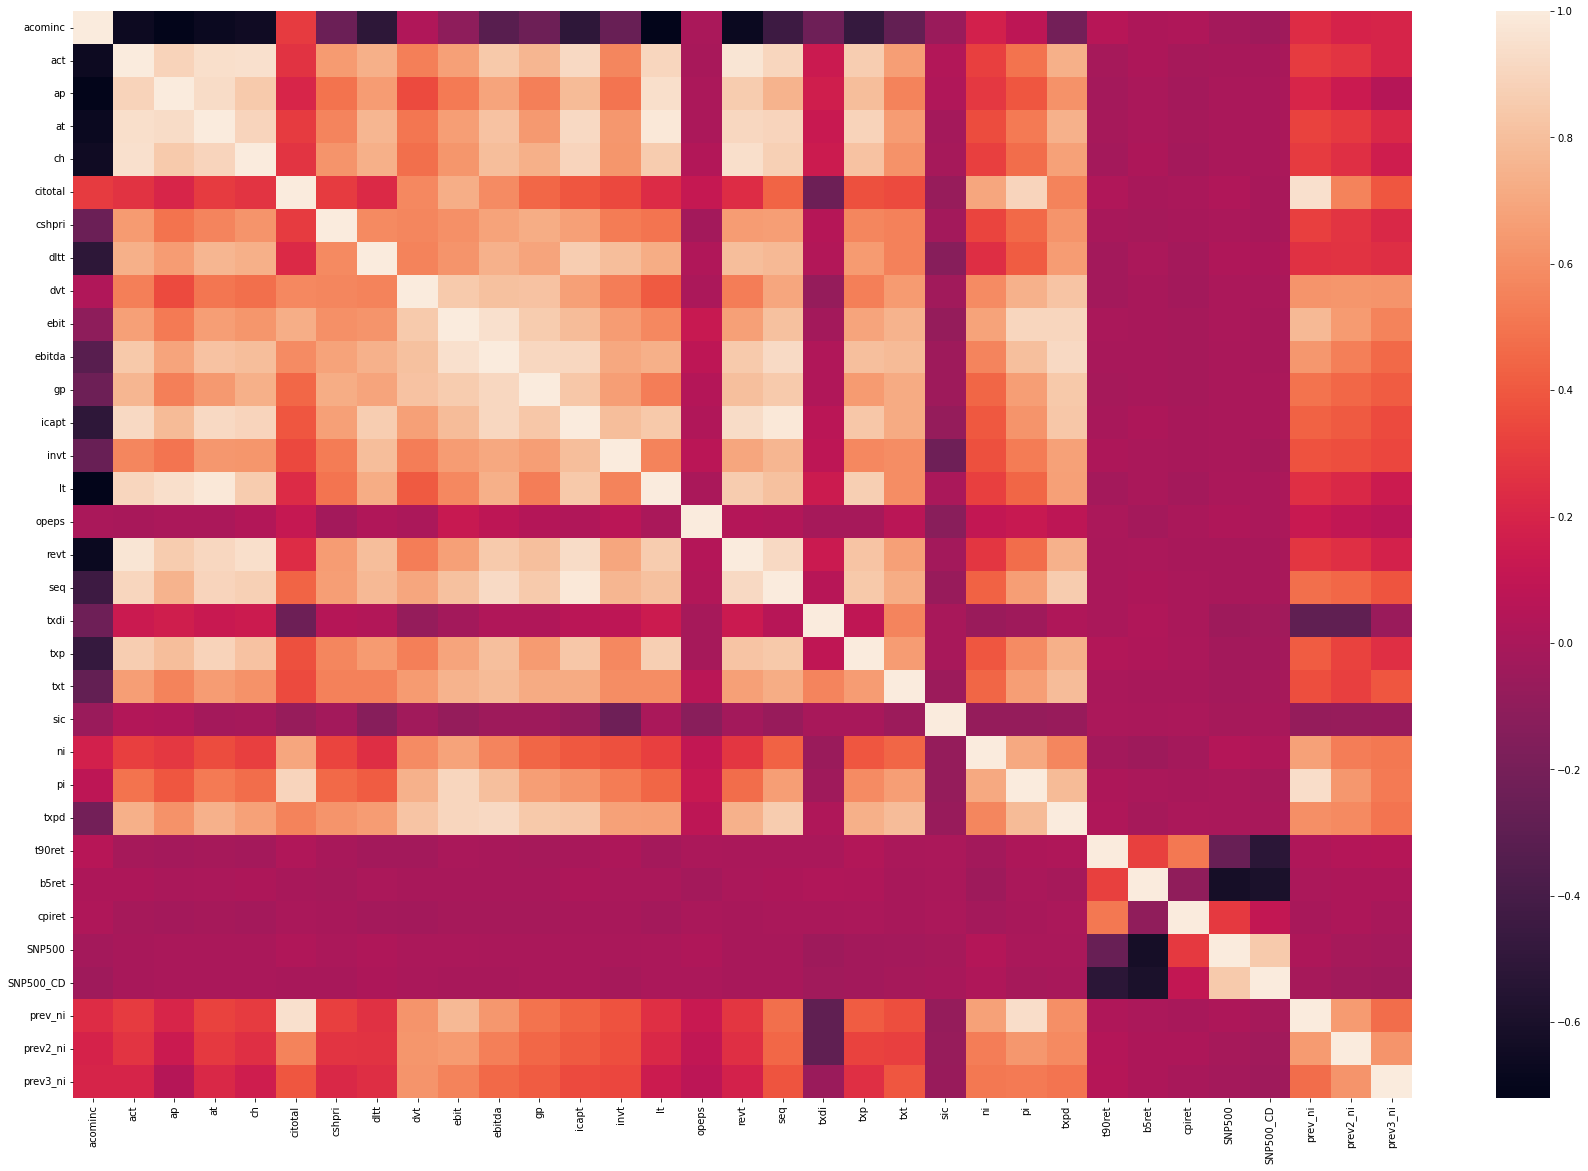

In [20]:
plt.gcf().set_size_inches(30, 20,  forward=True)
sns.heatmap(data.corr())
abs(data.corr()['ni']).sort_values()

In [21]:
data.drop(["ni"], axis = 1).columns

Index(['acominc', 'act', 'ap', 'at', 'ch', 'citotal', 'cshpri', 'dltt', 'dvt',
       'ebit', 'ebitda', 'gp', 'icapt', 'invt', 'lt', 'opeps', 'revt', 'seq',
       'txdi', 'txp', 'txt', 'sic', 'pi', 'txpd', 't90ret', 'b5ret', 'cpiret',
       'SNP500', 'SNP500_CD', 'prev_ni', 'prev2_ni', 'prev3_ni'],
      dtype='object')

In [22]:
import statsmodels.api as sm
from patsy import dmatrices

# y, X = dmatrices('ni ~ prev_ni+prev2_ni', data=data, return_type='dataframe')
y, X = dmatrices(f'ni ~ {"+".join(data.drop(["ni"], axis = 1).columns)}', data=data, return_type='dataframe')
X

,Intercept,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,...,pi,txpd,t90ret,b5ret,cpiret,SNP500,SNP500_CD,prev_ni,prev2_ni,prev3_ni
2004,1.0,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,...,10.0,1.0,0.01308,0.023355,0.032557,0.006291,0.016300,8.0,-1.0,6.0
2004,1.0,0.0,7.0,1.0,7.0,0.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.01308,0.023355,0.032557,0.006291,0.016300,0.0,-1.0,0.0
2004,1.0,-55.0,2098.0,387.0,4346.0,499.0,287.0,95.0,728.0,58.0,...,378.0,58.0,0.01308,0.023355,0.032557,0.006291,0.016300,269.0,135.0,78.0
2004,1.0,0.0,33.0,5.0,58.0,0.0,1.0,9.0,28.0,0.0,...,3.0,0.0,0.01308,0.023355,0.032557,0.006291,0.016300,3.0,2.0,27.0
2004,1.0,0.0,105.0,13.0,193.0,14.0,-9.0,11.0,50.0,0.0,...,10.0,-2.0,0.01308,0.023355,0.032557,0.006291,0.016300,7.0,-25.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1.0,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,...,24.0,4.0,0.00692,0.073770,0.013621,0.013940,0.010226,19.0,28.0,28.0
2020,1.0,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,...,-184.0,116.0,0.00692,0.073770,0.013621,0.013940,0.010226,-76.0,600.0,553.0
2020,1.0,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,...,897.0,305.0,0.00692,0.073770,0.013621,0.013940,0.010226,645.0,483.0,258.0
2020,1.0,0.0,218.0,20.0,535.0,49.0,16.0,33.0,113.0,0.0,...,20.0,6.0,0.00692,0.073770,0.013621,0.013940,0.010226,16.0,20.0,7.0


In [23]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ni   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     138.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:30:14   Log-Likelihood:                -14447.
No. Observations:                1917   AIC:                         2.896e+04
Df Residuals:                    1884   BIC:                         2.914e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.1372     39.457      1.068      0.286     -35.247     119.521
acominc        0.2984      0.043      6.974      0.000       0.214       0.382
act            0.0679      0.021      3.251      0.001       0.027       0.109
ap             0.1010      0.021      4.766      0.000       0.059       0.143
at            -6.1301     17.746     -0.345      0.730     -40.935      28.675
ch             0.1795      0.030      5.952      0.000       0.120       0.239
citotal        0.3370      0.055      6.148      0.000       0.229       0.445
cshpri         0.1027      0.037      2.749      0.006       0.029       0.176
dltt          -5.9275     17.748     -0.334      0.738     -40.735      28.880
dvt            0.4239      0.141      2.998      0.003       0.147       0.701
ebit           1.3376      0.097     13.829      0.000       1.148       1.527
ebitda        -0.8197      0.089     -9.187      0.000      -0.995      -0.645
gp             0.0320      0.018      1.804      0.071      -0.003       0.067
icapt          5.7426     17.747      0.324      0.746     -29.063      40.548
invt           0.1002      0.019      5.236      0.000       0.063       0.138
lt             6.1838     17.746      0.348      0.728     -28.621      40.988
opeps          0.9751      0.972      1.003      0.316      -0.932       2.882
revt          -0.0401      0.009     -4.230      0.000      -0.059      -0.021
seq            0.3492      0.051      6.793      0.000       0.248       0.450
txdi          -0.1161      0.150     -0.774      0.439      -0.410       0.178
txp           -1.1567      0.234     -4.936      0.000      -1.616      -0.697
txt            1.9549      0.304      6.436      0.000       1.359       2.551
sic           -0.0063      0.008     -0.760      0.447      -0.022       0.010
pi            -1.8771      0.268     -7.012      0.000      -2.402      -1.352
txpd          -0.4035      0.146     -2.763      0.006      -0.690      -0.117
t90ret     -1671.0754   1091.636     -1.531      0.126   -3812.018     469.868
b5ret       -562.6553    337.656     -1.666      0.096   -1224.874      99.563
cpiret      1287.7965   1434.753      0.898      0.370   -1526.076    4101.669
SNP500        90.9158   1666.041      0.055      0.956   -3176.564    3358.395
SNP500_CD   -102.2295    983.685     -0.104      0.917   -2031.457    1826.998
prev_ni        1.6109      0.281      5.741      0.000       1.061       2.161
prev2_ni      -0.0480      0.026     -1.857      0.063      -0.099       0.003
prev3_ni       0.2283      0.025      9.009      0.000       0.179       0.278
==============================================================================
Omnibus:                     1493.246   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           212732.433
Sk

### ...

In [24]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = data['ni'], data.drop(['ni'], axis = 1)
X

,acominc,act,ap,at,ch,citotal,cshpri,dltt,dvt,ebit,...,pi,txpd,t90ret,b5ret,cpiret,SNP500,SNP500_CD,prev_ni,prev2_ni,prev3_ni
2004,2.0,102.0,19.0,297.0,4.0,3.0,11.0,15.0,9.0,3.0,...,10.0,1.0,0.01308,0.023355,0.032557,0.006291,0.016300,8.0,-1.0,6.0
2004,0.0,7.0,1.0,7.0,0.0,-1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.01308,0.023355,0.032557,0.006291,0.016300,0.0,-1.0,0.0
2004,-55.0,2098.0,387.0,4346.0,499.0,287.0,95.0,728.0,58.0,400.0,...,378.0,58.0,0.01308,0.023355,0.032557,0.006291,0.016300,269.0,135.0,78.0
2004,0.0,33.0,5.0,58.0,0.0,1.0,9.0,28.0,0.0,7.0,...,3.0,0.0,0.01308,0.023355,0.032557,0.006291,0.016300,3.0,2.0,27.0
2004,0.0,105.0,13.0,193.0,14.0,-9.0,11.0,50.0,0.0,17.0,...,10.0,-2.0,0.01308,0.023355,0.032557,0.006291,0.016300,7.0,-25.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,-2.0,80.0,6.0,119.0,31.0,20.0,33.0,0.0,13.0,25.0,...,24.0,4.0,0.00692,0.073770,0.013621,0.013940,0.010226,19.0,28.0,28.0
2020,-567.0,3408.0,948.0,7698.0,909.0,-25.0,352.0,4099.0,213.0,824.0,...,-184.0,116.0,0.00692,0.073770,0.013621,0.013940,0.010226,-76.0,600.0,553.0
2020,-225.0,1807.0,79.0,3281.0,1093.0,637.0,130.0,611.0,0.0,889.0,...,897.0,305.0,0.00692,0.073770,0.013621,0.013940,0.010226,645.0,483.0,258.0
2020,0.0,218.0,20.0,535.0,49.0,16.0,33.0,113.0,0.0,30.0,...,20.0,6.0,0.00692,0.073770,0.013621,0.013940,0.010226,16.0,20.0,7.0


In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# data = load_boston()
# X = pd.DataFrame(data.data, columns=data.feature_names)
# y = data.target


def stepwise_selection(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  pi                             with p-value 3.0371e-289
Add  prev3_ni                       with p-value 1.29344e-27
Add  citotal                        with p-value 1.93126e-30
Add  ebit                           with p-value 1.45172e-20
Add  gp                             with p-value 7.63611e-21
Add  prev_ni                        with p-value 8.71126e-14
Drop pi                             with p-value 0.942308
Add  dltt                           with p-value 4.45908e-08
Add  ap                             with p-value 2.38766e-11
Add  ebitda                         with p-value 1.12547e-25
Drop gp                             with p-value 0.139546
Add  ch                             with p-value 1.7899e-06
Add  acominc                        with p-value 8.43073e-09
Add  lt                             with p-value 9.96446e-08
Add  at                             with p-value 2.19618e-10
Add  seq                            with p-value 9.71638e-15
Add  txp                       

In [45]:
# y, X = dmatrices(f'ni ~ {"+".join(data.drop(["ni"], axis = 1).columns)}', data=data, return_type='dataframe')
y, X = dmatrices(f'ni ~ {"+".join(result)}', data = data[result+['ni']], return_type='dataframe')
X

,Intercept,prev3_ni,citotal,ebit,prev_ni,dltt,ap,ebitda,ch,acominc,lt,at,seq,txp,cshpri,invt,t90ret,txpd,dvt
2004,1.0,6.0,3.0,3.0,8.0,15.0,19.0,13.0,4.0,2.0,76.0,297.0,221.0,0.0,11.0,47.0,0.01308,1.0,9.0
2004,1.0,0.0,-1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,7.0,5.0,0.0,1.0,3.0,0.01308,0.0,0.0
2004,1.0,78.0,287.0,400.0,269.0,728.0,387.0,558.0,499.0,-55.0,2634.0,4346.0,1712.0,0.0,95.0,786.0,0.01308,58.0,58.0
2004,1.0,27.0,1.0,7.0,3.0,28.0,5.0,7.0,0.0,0.0,39.0,58.0,18.0,0.0,9.0,14.0,0.01308,0.0,0.0
2004,1.0,-4.0,-9.0,17.0,7.0,50.0,13.0,30.0,14.0,0.0,90.0,193.0,103.0,1.0,11.0,49.0,0.01308,-2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1.0,28.0,20.0,25.0,19.0,0.0,6.0,27.0,31.0,-2.0,34.0,119.0,84.0,0.0,33.0,42.0,0.00692,4.0,13.0
2020,1.0,553.0,-25.0,824.0,-76.0,4099.0,948.0,956.0,909.0,-567.0,6884.0,7698.0,813.0,0.0,352.0,1491.0,0.00692,116.0,213.0
2020,1.0,258.0,637.0,889.0,645.0,611.0,79.0,1051.0,1093.0,-225.0,1329.0,3281.0,1952.0,26.0,130.0,518.0,0.00692,305.0,0.0
2020,1.0,7.0,16.0,30.0,16.0,113.0,20.0,54.0,49.0,0.0,201.0,535.0,303.0,2.0,33.0,123.0,0.00692,6.0,0.0


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
model = sm.OLS(y_train, X_train)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ni   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     187.8
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:35:00   Log-Likelihood:                -11444.
No. Observations:                1533   AIC:                         2.293e+04
Df Residuals:                    1514   BIC:                         2.303e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.1983     15.664      0.906      0.365     -16.528      44.924
prev3_ni       0.2125      0.024      8.931      0.000       0.166       0.259
citotal        0.5330      0.056      9.544      0.000       0.423       0.643
ebit           1.6492      0.094     17.592      0.000       1.465       1.833
prev_ni       -0.4678      0.062     -7.507      0.000      -0.590      -0.346
dltt          -0.0438      0.019     -2.365      0.018      -0.080      -0.007
ap             0.1663      0.024      6.936      0.000       0.119       0.213
ebitda        -1.1908      0.082    -14.487      0.000      -1.352      -1.030
ch             0.1203      0.024      4.920      0.000       0.072       0.168
acominc        0.1762      0.040      4.364      0.000       0.097       0.255
lt             0.3607      0.045      8.055      0.000       0.273       0.449
at            -0.3402      0.044     -7.667      0.000      -0.427      -0.253
seq            0.3569      0.050      7.185      0.000       0.259       0.454
txp            0.0598      0.259      0.231      0.818      -0.448       0.568
cshpri         0.1731      0.052      3.313      0.001       0.071       0.276
invt           0.0019      0.012      0.159      0.874      -0.022       0.025
t90ret     -1969.3007    708.269     -2.780      0.005   -3358.592    -580.009
txpd          -0.3903      0.132     -2.958      0.003      -0.649      -0.131
dvt            0.4862      0.138      3.513      0.000       0.215       0.758
==============================================================================
Omnibus:                     1098.703   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146833.216
Skew:                          -2.454   Prob(JB):                         0.00
Kurtosis:                      50.693   Cond. No.                     1.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, result.predict(X_test))

0.6283229462131275